# PLE02: Preparación de los datos

## Análisis EDA simple

En este notebook se implementarán las funciones necesarias para hacer una preparación y análisis de los datos mediante un EDA

In [19]:
# Importación de las bibliotecas necesarias 
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



#### Carga de los datos

In [20]:
# Carga de los datos del csv
CSV_FILE = 'proy_escuela_dev.csv' 
df = pd.read_csv(CSV_FILE, index_col = 0)

# Verificar la estructura del dataframe
print(f"Dimensiones del dataframe completo {df.shape}")

# Inspección de los primeros registros del dataframe 
print("Primeros registros del dataset completo")
print(df.head())


Dimensiones del dataframe completo (595, 40)
Primeros registros del dataset completo
                                                 dni    campus  \
id_estudiante_proy                                               
511                 3090960be7fa45d5a21095a83ff9c1da  A Coruña   
255                 efb6ca5df4824879b8b49d892d792e55  A Coruña   
377                 816fcb104f8242aa802a5c10a32d40da      Vigo   
642                 c8b5aff68b524a139106d3a98b4d5cbe  A Coruña   
318                 66ddb021477d4893bb9408e273c58aef  A Coruña   

                                          titulacion  \
id_estudiante_proy                                     
511                 f1bfc2083f3c4ebcbcd8b2a48321f02a   
255                 d23620300d7d42209fd7f4fc2fe34ce6   
377                 fcfc3c42ec3e41acb44fd74494985d8b   
642                 848dd3d4434b42dfa9a886213834afc4   
318                 26878c9a3e2c4c349f1ae828b3863eac   

                                              nombre  \
id_

#### Estructura de los datos
1. Conjunto de los datos
2. Tipos de los datos


In [21]:
# Número de filas y columnas

num_filas, num_columnas = df.shape[0] , df.shape[1]

mensaje = f"""
\n ****** NUMERO DE FILAS/COLUMNAS ******\n

      El numero de filas es de {num_filas + 1} \n
     El numero de columnas es de {num_columnas + 1} 

"""
print(mensaje)


# Ver nombre de las columnas 
print("\n ****** NOMBRES DE LAS COLUMNAS ******\n")
print(df.columns)




 ****** NUMERO DE FILAS/COLUMNAS ******


      El numero de filas es de 596 

     El numero de columnas es de 41 



 ****** NOMBRES DE LAS COLUMNAS ******

Index(['dni', 'campus', 'titulacion', 'nombre', 'apellidos', 'sexo', 'edad',
       'direccion', 'telefono1', 'telefono2', 'email', 'fecha_nacimiento',
       'entorno_vivienda', 'tamano_familia', 'independizado_padres',
       'educacion_madre', 'educacion_padre', 'ocupacion_madre',
       'ocupacion_padre', 'razon_matricula', 'interes_educacion_superior',
       'internet_casa', 'tiempo_viaje', 'tiempo_estudio', 'apoyo_escolar',
       'apoyo_familiar', 'actividades', 'relacion_romantica',
       'relacion_familiar', 'tiempo_libre', 'salir_amigos',
       'consumo_alcohol_entre_semana', 'consumo_alcohol_fin_de_semana',
       'salud', 'suspensos', 'faltas', 'nota1', 'nota2', 'nota3',
       'usuario_alta_datos'],
      dtype='object')


In [22]:
columnas_a_eliminar = ['dni', 'titulacion', 'nombre', 'apellidos', 'direccion', 'telefono1', 'telefono2', 'email', 'fecha_nacimiento', 'usuario_alta_datos']
columnas_existentes = [col for col in columnas_a_eliminar if col in df.columns]
df = df.drop(columns=columnas_existentes)
df.head()

,campus,sexo,edad,entorno_vivienda,tamano_familia,independizado_padres,educacion_madre,educacion_padre,ocupacion_madre,ocupacion_padre,...,tiempo_libre,salir_amigos,consumo_alcohol_entre_semana,consumo_alcohol_fin_de_semana,salud,suspensos,faltas,nota1,nota2,nota3
id_estudiante_proy,,,,,,,,,,,,,,,,,,,,,
511,A Coruña,V,15.0,urbano,<=3,independizado,4.0,3.0,profesor,servicios,...,4.0,3.0,1.0,1.0,4.0,0.0,0.0,14.0,14.0,14.0
255,A Coruña,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377,Vigo,M,18.0,rural,>3,independizado,2.0,2.0,servicios,otro,...,2.0,1.0,1.0,1.0,4.0,0.0,5.0,14.0,14.0,15.0
642,A Coruña,V,17.0,urbano,>3,independizado,3.0,2.0,servicios,servicios,...,5.0,5.0,2.0,4.0,5.0,3.0,2.0,8.0,8.0,7.0
318,A Coruña,M,18.0,urbano,>3,independizado,4.0,4.0,salud,salud,...,4.0,4.0,1.0,1.0,4.0,1.0,2.0,14.0,12.0,13.0


In [23]:
# Número de filas y columnas

num_filas, num_columnas = df.shape[0] , df.shape[1]

mensaje = f"""
\n ****** NUMERO DE FILAS/COLUMNAS ******\n

      El numero de filas es de {num_filas + 1} \n
     El numero de columnas es de {num_columnas + 1} 

"""
print(mensaje)


# Ver nombre de las columnas 
print("\n ****** NOMBRES DE LAS COLUMNAS ******\n")
print(df.columns)




 ****** NUMERO DE FILAS/COLUMNAS ******


      El numero de filas es de 596 

     El numero de columnas es de 31 



 ****** NOMBRES DE LAS COLUMNAS ******

Index(['campus', 'sexo', 'edad', 'entorno_vivienda', 'tamano_familia',
       'independizado_padres', 'educacion_madre', 'educacion_padre',
       'ocupacion_madre', 'ocupacion_padre', 'razon_matricula',
       'interes_educacion_superior', 'internet_casa', 'tiempo_viaje',
       'tiempo_estudio', 'apoyo_escolar', 'apoyo_familiar', 'actividades',
       'relacion_romantica', 'relacion_familiar', 'tiempo_libre',
       'salir_amigos', 'consumo_alcohol_entre_semana',
       'consumo_alcohol_fin_de_semana', 'salud', 'suspensos', 'faltas',
       'nota1', 'nota2', 'nota3'],
      dtype='object')


In [24]:
# Tipos de datos
print("\n ******TIPOS DE DATOS****** \n")
print(df.dtypes)


 ******TIPOS DE DATOS****** 

campus                            object
sexo                              object
edad                             float64
entorno_vivienda                  object
tamano_familia                    object
independizado_padres              object
educacion_madre                  float64
educacion_padre                  float64
ocupacion_madre                   object
ocupacion_padre                   object
razon_matricula                   object
interes_educacion_superior        object
internet_casa                     object
tiempo_viaje                     float64
tiempo_estudio                   float64
apoyo_escolar                     object
apoyo_familiar                    object
actividades                       object
relacion_romantica                object
relacion_familiar                float64
tiempo_libre                     float64
salir_amigos                     float64
consumo_alcohol_entre_semana     float64
consumo_alcohol_fin_de_sem

#### Estadísticas descriptivas

1. Identificación de variables numéricas y categóricas.

2. Resumen general de las variables numéricas

In [25]:
# Mostrar únicamente las variables categóricas del DataFrame
df_categoricas = df.select_dtypes(include=['object', 'category'])
print(df_categoricas.columns)

Index(['campus', 'sexo', 'entorno_vivienda', 'tamano_familia',
       'independizado_padres', 'ocupacion_madre', 'ocupacion_padre',
       'razon_matricula', 'interes_educacion_superior', 'internet_casa',
       'apoyo_escolar', 'apoyo_familiar', 'actividades', 'relacion_romantica'],
      dtype='object')


#### Transformación de variables categóricas numéricas

In [26]:
# Transformar la variable categórica 'campus' en variables dummy con prefijos 'Vigo' y 'Coruna'
# df = pd.get_dummies(df, columns=['campus'], prefix=['campus'])


# Transformar todas las variables categóricas en variables dummy
df = pd.get_dummies(df, columns=df_categoricas.columns, drop_first=True)

# Mostrar las primeras filas del DataFrame para verificar la transformación
print(df.columns)



Index(['edad', 'educacion_madre', 'educacion_padre', 'tiempo_viaje',
       'tiempo_estudio', 'relacion_familiar', 'tiempo_libre', 'salir_amigos',
       'consumo_alcohol_entre_semana', 'consumo_alcohol_fin_de_semana',
       'salud', 'suspensos', 'faltas', 'nota1', 'nota2', 'nota3',
       'campus_Vigo', 'sexo_V', 'entorno_vivienda_urbano', 'tamano_familia_>3',
       'independizado_padres_independizado', 'ocupacion_madre_otro',
       'ocupacion_madre_profesor', 'ocupacion_madre_salud',
       'ocupacion_madre_servicios', 'ocupacion_padre_otro',
       'ocupacion_padre_profesor', 'ocupacion_padre_salud',
       'ocupacion_padre_servicios', 'razon_matricula_curso',
       'razon_matricula_otro', 'razon_matricula_reputacion_centro',
       'interes_educacion_superior_1.0', 'interes_educacion_superior_False',
       'interes_educacion_superior_True', 'interes_educacion_superior_no',
       'interes_educacion_superior_si', 'interes_educacion_superior_yes',
       'internet_casa_1.0', 'in

In [27]:
print("Resumen estadístico de las variables numéricas: \n ", df.describe())

Resumen estadístico de las variables numéricas: 
               edad  educacion_madre  educacion_padre  tiempo_viaje  \
count  587.000000       587.000000       587.000000    587.000000   
mean    16.606474         2.519591         2.277683      1.546848   
std      1.590337         1.122622         1.097420      0.738347   
min     10.000000         0.000000         0.000000      1.000000   
25%     16.000000         2.000000         1.000000      1.000000   
50%     17.000000         2.000000         2.000000      1.000000   
75%     18.000000         4.000000         3.000000      2.000000   
max     22.000000         4.000000         4.000000      4.000000   

       tiempo_estudio  relacion_familiar  tiempo_libre  salir_amigos  \
count      587.000000         587.000000    587.000000    587.000000   
mean         1.914821           3.880750      3.160136      3.153322   
std          0.832100           0.999703      1.053960      1.167098   
min          1.000000           1.00000

In [28]:
# Seleccionar las columnas con variables numéricas

df_numerico = df.select_dtypes(include = [np.number])

media = df_numerico.mean()
mediana = df_numerico.median()
val_min = df_numerico.min()
val_max = df_numerico.max()
des_estandar= df_numerico.std()
conteo= df_numerico.count()


mensaje_media = f"""A continuación se muestra la Media:
 
{media}
\n
"""
print(mensaje_media)


A continuación se muestra la Media:
 
edad                             16.606474
educacion_madre                   2.519591
educacion_padre                   2.277683
tiempo_viaje                      1.546848
tiempo_estudio                    1.914821
relacion_familiar                 3.880750
tiempo_libre                      3.160136
salir_amigos                      3.153322
consumo_alcohol_entre_semana      1.478705
consumo_alcohol_fin_de_semana     2.253833
salud                             3.432709
suspensos                         0.207836
faltas                            3.734242
nota1                            11.381601
nota2                            11.587734
nota3                            11.960818
dtype: float64





In [29]:
mensaje_mediana = f"""
Mediana: 
{mediana}
\n

"""

print(mensaje_mediana)


Mediana: 
edad                             17.0
educacion_madre                   2.0
educacion_padre                   2.0
tiempo_viaje                      1.0
tiempo_estudio                    2.0
relacion_familiar                 4.0
tiempo_libre                      3.0
salir_amigos                      3.0
consumo_alcohol_entre_semana      1.0
consumo_alcohol_fin_de_semana     2.0
salud                             4.0
suspensos                         0.0
faltas                            2.0
nota1                            11.0
nota2                            11.0
nota3                            12.0
dtype: float64






In [30]:
otros_mensajes = f"""Valor mínimo: 
{val_min}
\n
Valor máximo: 
{val_max}
\n
Desviación estándar: 
{des_estandar}
\n
Conteo de valores no nulos: 
{conteo}"""
print(otros_mensajes)

Valor mínimo: 
edad                             10.0
educacion_madre                   0.0
educacion_padre                   0.0
tiempo_viaje                      1.0
tiempo_estudio                    1.0
relacion_familiar                 1.0
tiempo_libre                      1.0
salir_amigos                      1.0
consumo_alcohol_entre_semana      1.0
consumo_alcohol_fin_de_semana     1.0
salud                             1.0
suspensos                         0.0
faltas                            0.0
nota1                             0.0
nota2                             0.0
nota3                             0.0
dtype: float64


Valor máximo: 
edad                             22.0
educacion_madre                   4.0
educacion_padre                   4.0
tiempo_viaje                      4.0
tiempo_estudio                    4.0
relacion_familiar                 6.0
tiempo_libre                      6.0
salir_amigos                      6.0
consumo_alcohol_entre_semana      6.0
con

## Eliminación de datos encriptados
No aportan informacion al modelos

#### Distribución de las variables 

In [31]:
# Seleccionar columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns

# Seleccionar columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns

#Generar gráficos de caja para columnas numéricas
for columna in columnas_numericas:
    fig = px.box(df, y=columna)
    fig.update_layout(
        title=f'Gráfico de caja para {columna}',
        yaxis_title=columna,
        xaxis_title='Categoría'
    )
    fig.show()

### Correlación entre variables 

In [32]:
# Generar gráficos de violín para cada variable
for col in columnas_numericas:
    fig = px.violin(
        df, 
        y=col, 
        box=True, 
        points="all",
        title=f'Gráfico de violín para {col}',
        labels={col: col}
    )
    fig.show()


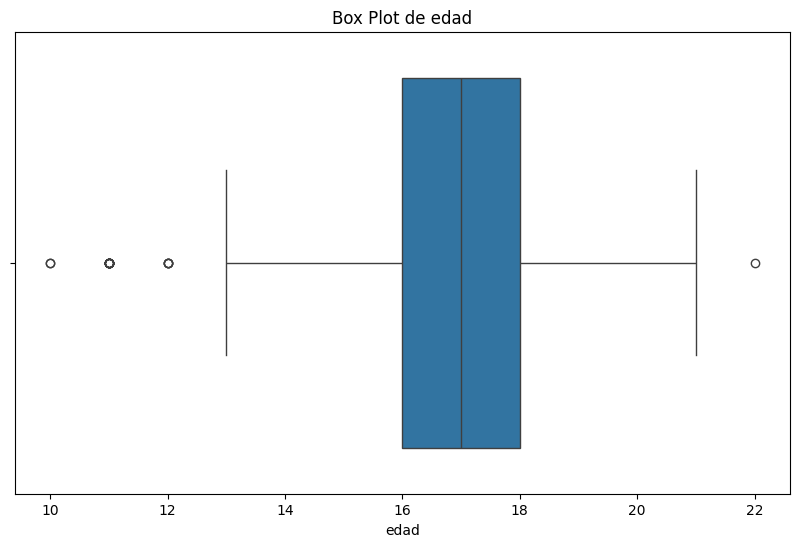

Valores atípicos en edad:
id_estudiante_proy
298    10.0
504    11.0
224    11.0
272    11.0
170    12.0
449    11.0
289    12.0
557    12.0
231    11.0
10     11.0
569    11.0
695    11.0
306    11.0
538    11.0
30     12.0
508    22.0
639    11.0
573    10.0
499    11.0
Name: edad, dtype: float64



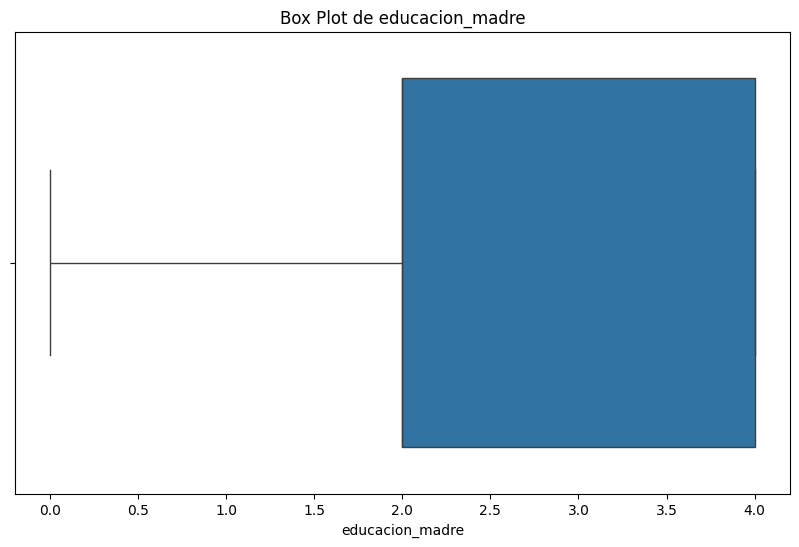

Valores atípicos en educacion_madre:
Series([], Name: educacion_madre, dtype: float64)



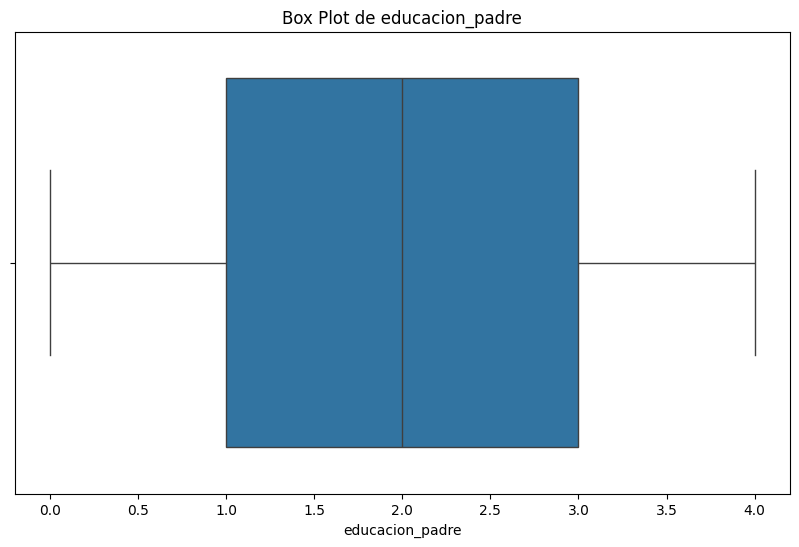

Valores atípicos en educacion_padre:
Series([], Name: educacion_padre, dtype: float64)



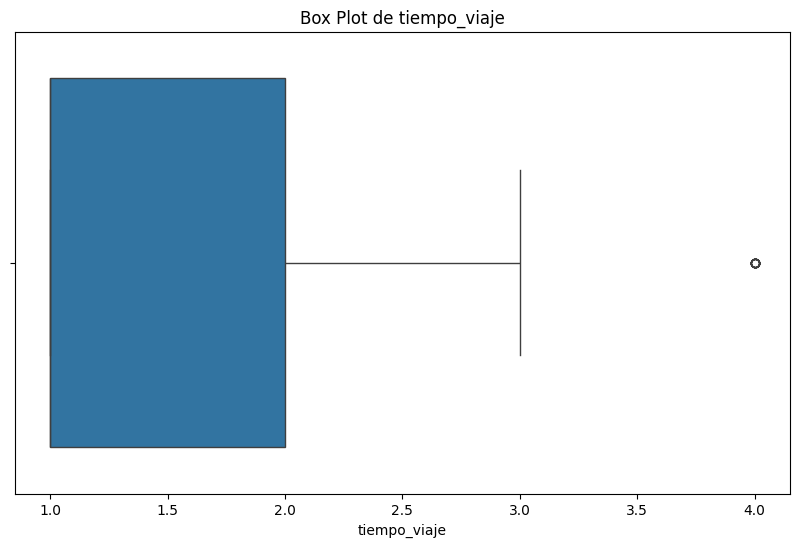

Valores atípicos en tiempo_viaje:
id_estudiante_proy
673    4.0
600    4.0
172    4.0
560    4.0
251    4.0
495    4.0
114    4.0
572    4.0
541    4.0
278    4.0
631    4.0
173    4.0
Name: tiempo_viaje, dtype: float64



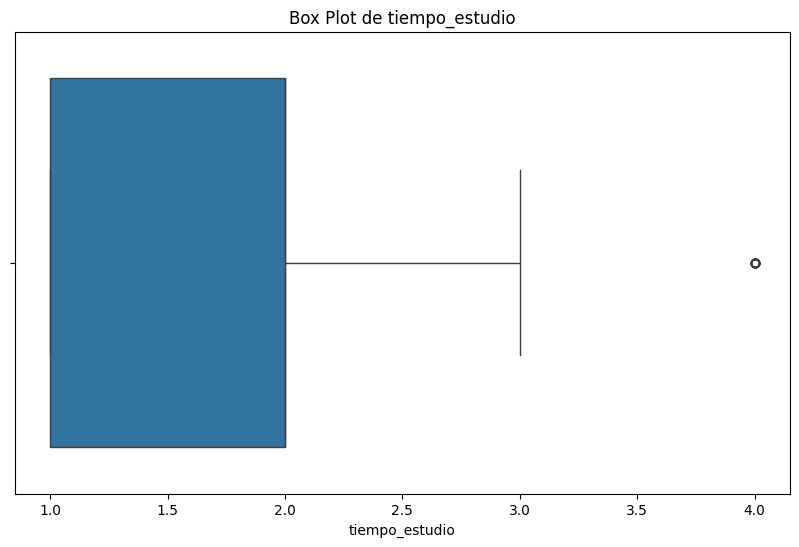

Valores atípicos en tiempo_estudio:
id_estudiante_proy
347    4.0
335    4.0
273    4.0
312    4.0
471    4.0
588    4.0
478    4.0
464    4.0
151    4.0
119    4.0
411    4.0
571    4.0
396    4.0
341    4.0
549    4.0
331    4.0
541    4.0
562    4.0
328    4.0
214    4.0
217    4.0
486    4.0
337    4.0
623    4.0
213    4.0
625    4.0
31     4.0
287    4.0
680    4.0
77     4.0
556    4.0
Name: tiempo_estudio, dtype: float64



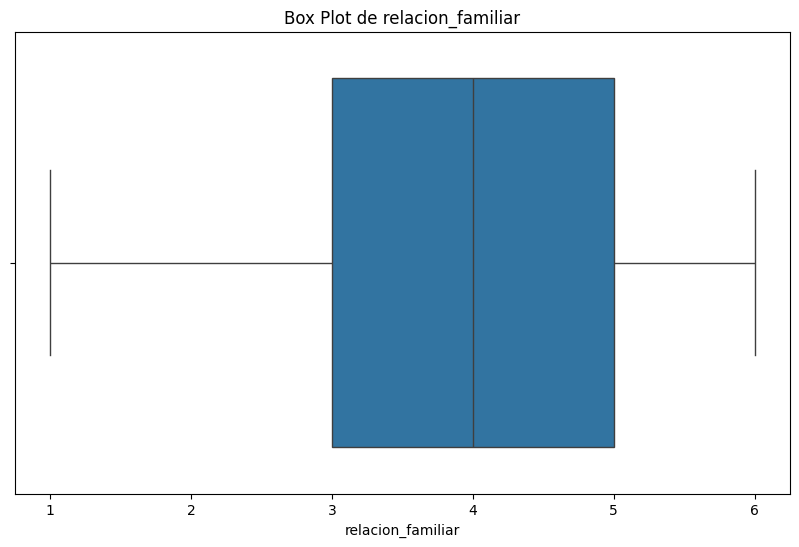

Valores atípicos en relacion_familiar:
Series([], Name: relacion_familiar, dtype: float64)



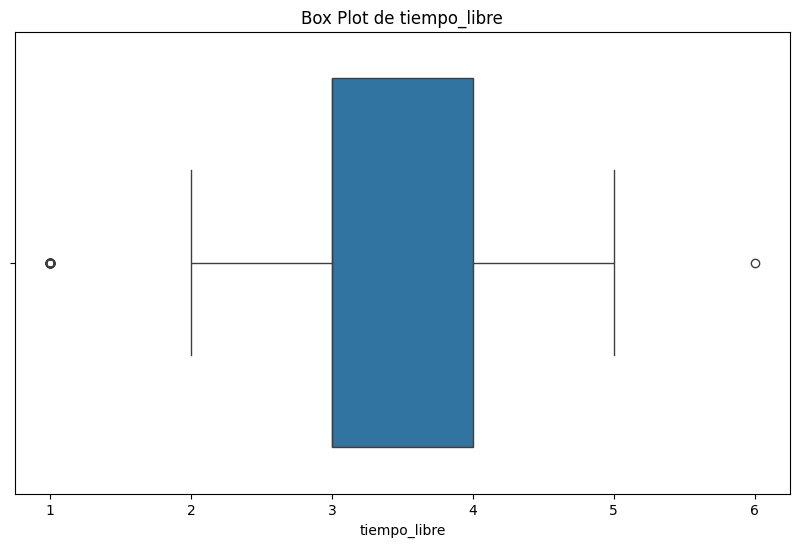

Valores atípicos en tiempo_libre:
id_estudiante_proy
61     6.0
224    1.0
281    1.0
297    1.0
459    1.0
50     1.0
286    1.0
557    1.0
633    1.0
12     1.0
375    1.0
341    1.0
325    1.0
189    1.0
481    1.0
345    1.0
204    1.0
558    1.0
626    1.0
330    1.0
267    1.0
572    1.0
394    1.0
695    1.0
415    1.0
102    1.0
587    1.0
623    1.0
608    1.0
233    1.0
443    1.0
259    1.0
668    1.0
367    1.0
206    1.0
152    1.0
660    1.0
31     1.0
602    1.0
6      1.0
530    1.0
628    1.0
Name: tiempo_libre, dtype: float64



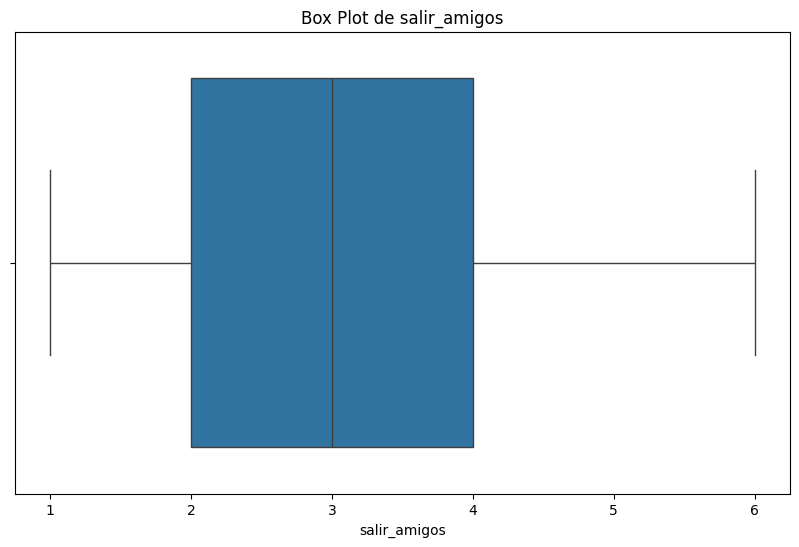

Valores atípicos en salir_amigos:
Series([], Name: salir_amigos, dtype: float64)



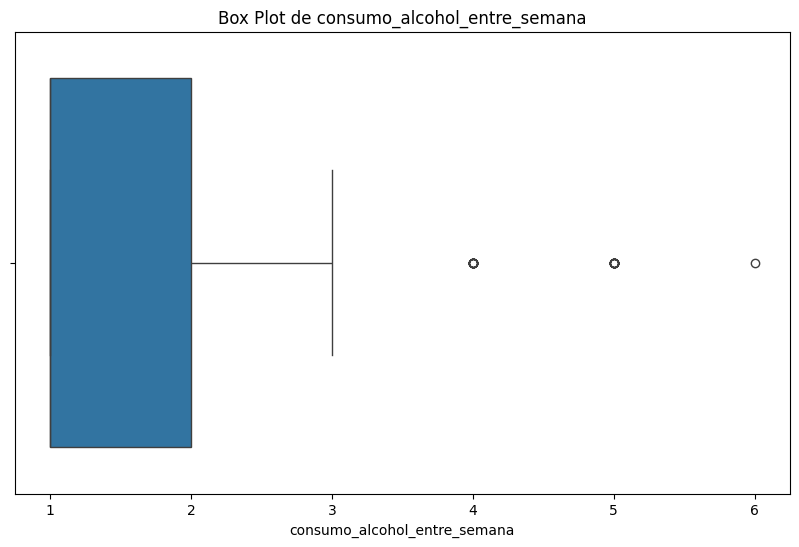

Valores atípicos en consumo_alcohol_entre_semana:
id_estudiante_proy
673    4.0
254    4.0
172    5.0
421    5.0
7      5.0
393    4.0
348    4.0
495    5.0
283    4.0
455    4.0
425    4.0
189    5.0
662    4.0
603    5.0
533    4.0
217    5.0
585    4.0
334    6.0
183    4.0
367    5.0
500    5.0
508    5.0
59     5.0
479    5.0
247    5.0
60     4.0
530    4.0
628    4.0
Name: consumo_alcohol_entre_semana, dtype: float64



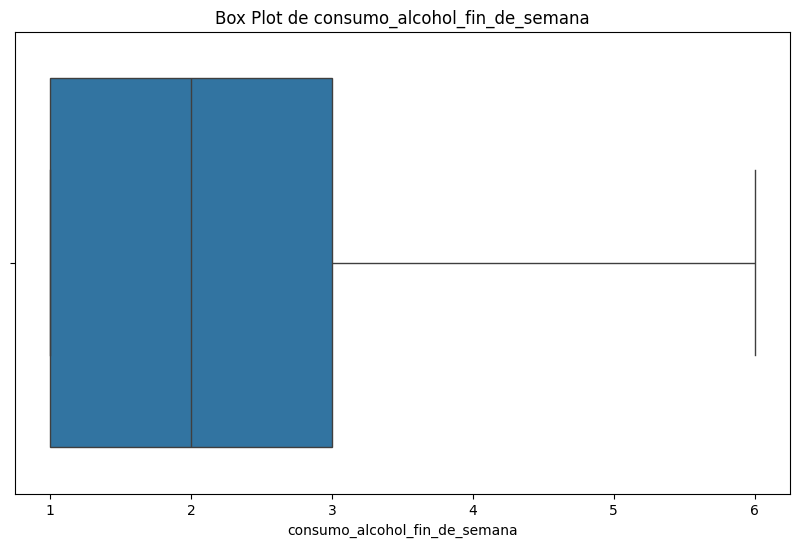

Valores atípicos en consumo_alcohol_fin_de_semana:
Series([], Name: consumo_alcohol_fin_de_semana, dtype: float64)



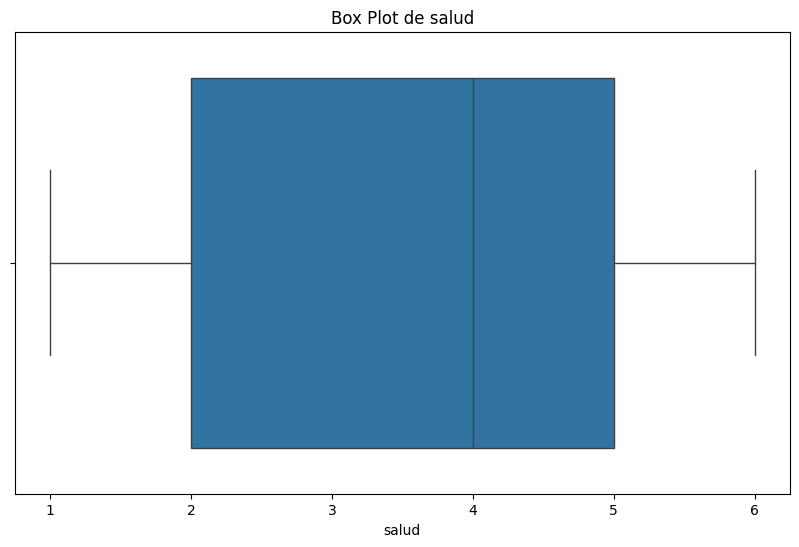

Valores atípicos en salud:
Series([], Name: salud, dtype: float64)



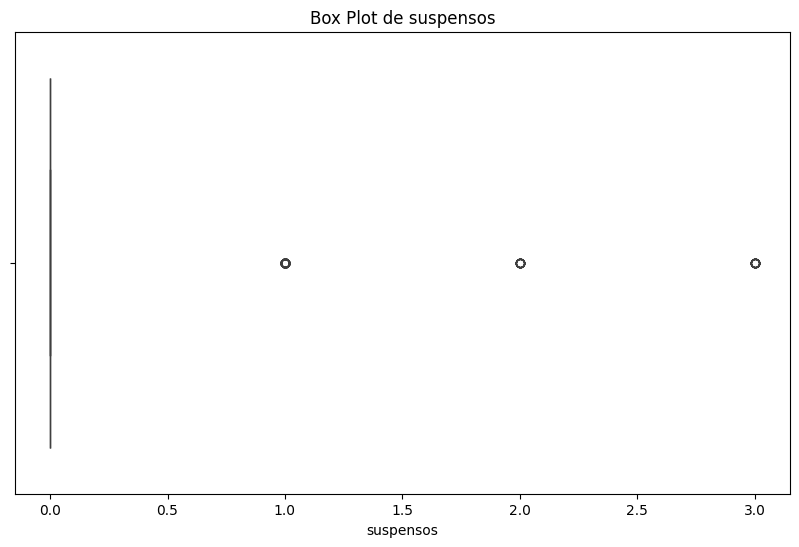

Valores atípicos en suspensos:
id_estudiante_proy
642    3.0
318    1.0
474    2.0
450    1.0
244    1.0
      ... 
313    3.0
33     2.0
36     1.0
226    2.0
530    1.0
Name: suspensos, Length: 85, dtype: float64



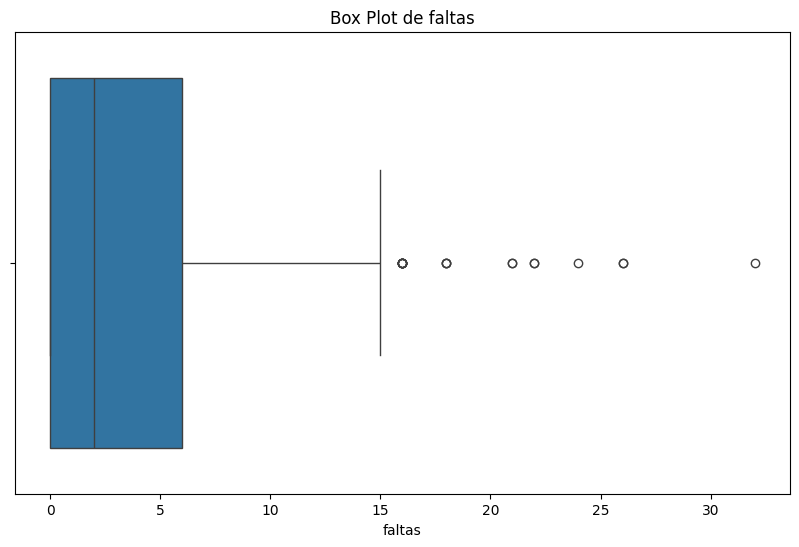

Valores atípicos en faltas:
id_estudiante_proy
7      21.0
528    26.0
446    32.0
22     21.0
675    18.0
125    24.0
71     16.0
307    18.0
634    16.0
431    16.0
483    16.0
17     16.0
533    16.0
15     18.0
467    26.0
424    16.0
78     22.0
229    22.0
661    16.0
Name: faltas, dtype: float64



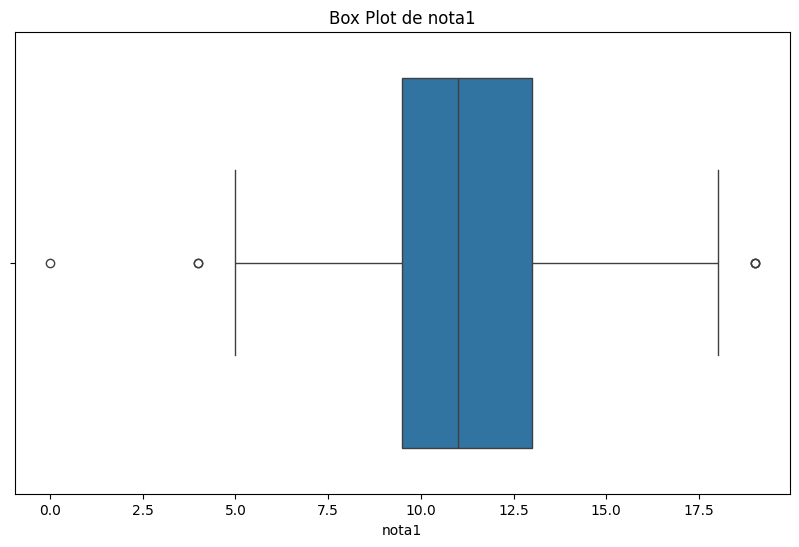

Valores atípicos en nota1:
id_estudiante_proy
358    19.0
317    19.0
536     0.0
350    19.0
207     4.0
226     4.0
Name: nota1, dtype: float64



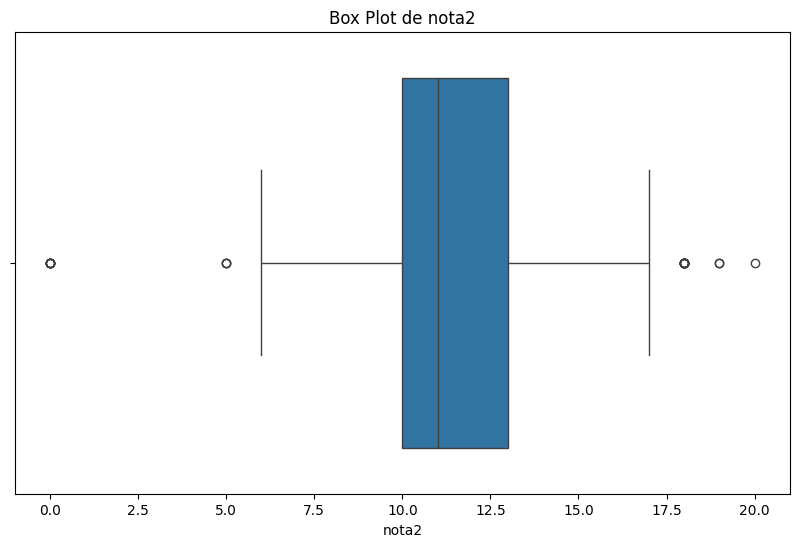

Valores atípicos en nota2:
id_estudiante_proy
698    18.0
96     18.0
358    18.0
574    18.0
696    18.0
75     18.0
122    18.0
535     5.0
140     0.0
167     0.0
200     0.0
201    18.0
399    19.0
350    20.0
690    18.0
328    18.0
607     5.0
623    19.0
550     0.0
334    18.0
183     0.0
158    18.0
258    18.0
369    18.0
236     0.0
207     0.0
499     5.0
Name: nota2, dtype: float64



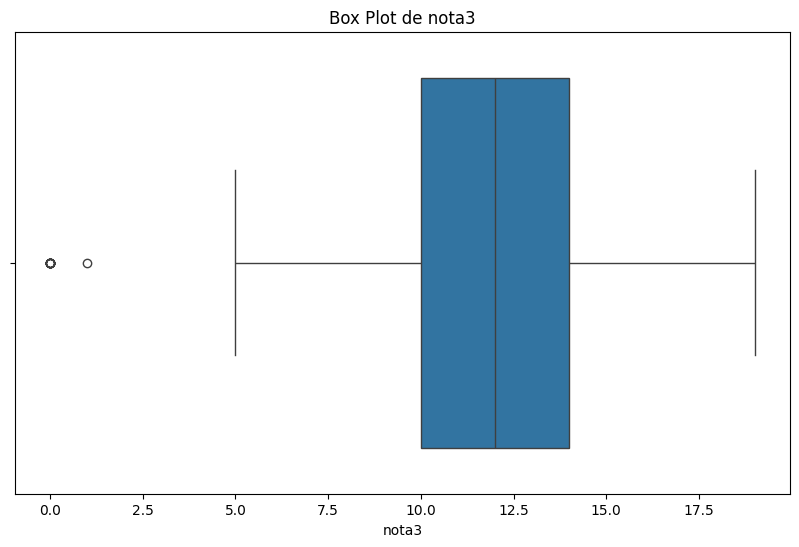

Valores atípicos en nota3:
id_estudiante_proy
688    0.0
140    0.0
167    0.0
200    0.0
585    1.0
550    0.0
362    0.0
183    0.0
235    0.0
694    0.0
236    0.0
207    0.0
60     0.0
Name: nota3, dtype: float64



In [33]:
for col in columnas_numericas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot de {col}')
    plt.xlabel(col)
    plt.show()

    # Calcular valores atípicos utilizando IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f'Valores atípicos en {col}:')
    print(outliers[col])
    print()

#### Matriz de correlación: 


Hay que eliminar antes los datos atípicos

In [34]:
# Eliminación de los datos atípicos

# Seleccionar columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns

# Función para eliminar valores atípicos
def eliminar_valores_atipicos(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    # Aplicamos un filtro para no devolver los datos por debajo y por arriba
    filtro = (df[columna] >= (Q1 - 1.5 * IQR)) & (df[columna] <= (Q3 + 1.5 * IQR))
    return df[filtro]

# Eliminar valores atípicos para todas las columnas numéricas
for columna in columnas_numericas:
    df = eliminar_valores_atipicos(df, columna)

# Mostrar las primeras filas del DataFrame para verificar la eliminación
df.head()

,edad,educacion_madre,educacion_padre,tiempo_viaje,tiempo_estudio,relacion_familiar,tiempo_libre,salir_amigos,consumo_alcohol_entre_semana,consumo_alcohol_fin_de_semana,...,actividades_True,actividades_no,actividades_si,actividades_yes,relacion_romantica_1.0,relacion_romantica_False,relacion_romantica_True,relacion_romantica_no,relacion_romantica_si,relacion_romantica_yes
id_estudiante_proy,,,,,,,,,,,,,,,,,,,,,
511,15.0,4.0,3.0,1.0,3.0,5.0,4.0,3.0,1.0,1.0,...,False,False,False,True,False,False,False,True,False,False
377,18.0,2.0,2.0,2.0,3.0,4.0,2.0,1.0,1.0,1.0,...,False,True,False,False,False,False,False,False,True,False
426,19.0,4.0,2.0,2.0,2.0,5.0,4.0,4.0,1.0,1.0,...,False,False,False,True,False,False,False,False,False,True
414,18.0,2.0,1.0,2.0,2.0,5.0,3.0,3.0,1.0,2.0,...,False,False,False,True,False,False,False,True,False,False
485,16.0,1.0,2.0,2.0,1.0,5.0,4.0,5.0,1.0,4.0,...,False,False,False,False,False,False,False,False,False,False


### Variables a eliminar antes de la matriz de correlación

Datos sensibles que han sido encriptados como el nombre, apellidos, teléfono, etc. se pueden eliminar porque no añaden utilidad al futuro modelo de predicción. Además, aunque fuesen datos numéricos y válidos, no resulta significativo para predecir el valor de las calificaciones de un alumno. 

In [35]:
#Eliminar las columnas especificadas
columnas_a_eliminar = ['dni', 'titulacion', 
                       'nombre', 'apellidos', 
                       'direccion', 
                       'telefono1', 'telefono2', 
                       'email', 
                       'fecha_nacimiento']
df = df.drop(columns=columnas_a_eliminar)
df.head()

KeyError: "['dni', 'titulacion', 'nombre', 'apellidos', 'direccion', 'telefono1', 'telefono2', 'email', 'fecha_nacimiento'] not found in axis"

In [ ]:
# Calcular la matriz de correlación para las columnas_numericas
corr_matrix = df.corr()

# Mostrar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm'
)
plt.title('Matriz de Correlación')
plt.show()

: 

: 

#### Eliminación de variables que no resultan significativas




In [ ]:
#Eliminar las columnas especificadas
columnas_a_eliminar = ['suspensos', 'faltas']
df = df.drop(columns=columnas_a_eliminar)
df.head()

#### Análisis por variable

In [ ]:
# Crear un DataFrame para almacenar los resultados por variable
resultados_por_variable = []

# Analizar cada variable
for var in columnas_numericas:
    analisis = {
        'Variable': var,
        'Media': df[var].mean(),
        'Mediana': df[var].median(),
        'Desviacion Estandar': df[var].std(),
        'Valor Minimo': df[var].min(),
        'Valor Maximo': df[var].max()
    }
    resultados_por_variable.append(analisis)

# Convertir los resultados a un DataFrame
resultados_por_variable_df = pd.DataFrame(resultados_por_variable)

# Mostrar los resultados
print("Análisis por Variable:")
print(resultados_por_variable_df)

Análisis por Variable:
                         Variable      Media  Mediana  Desviacion Estandar  \
0                            edad  16.617318     17.0             1.150536   
1                 educacion_madre   2.620112      3.0             1.135541   
2                 educacion_padre   2.441341      2.0             1.102922   
3                    tiempo_viaje   1.449721      1.0             0.636418   
4                  tiempo_estudio   1.916201      2.0             0.705096   
5               relacion_familiar   4.153631      4.0             0.645064   
6                    tiempo_libre   3.290503      3.0             0.869315   
7                    salir_amigos   3.145251      3.0             1.100607   
8    consumo_alcohol_entre_semana   1.296089      1.0             0.556637   
9   consumo_alcohol_fin_de_semana   2.122905      2.0             1.145680   
10                          salud   3.553073      4.0             1.434364   
11                      suspensos   0.000

#### Estandarización y normalización de los datos


In [ ]:
# Estandarización 
features = df[columnas_numericas]

scaler_standard = StandardScaler()
features_standardized = scaler_standard.fit_transform(features)
df_standardized = pd.DataFrame(features_standardized, columns=features.columns)

# Mostrar los resultados de la estandarización
print("Estandarización:")
print(df_standardized.head())

Estandarización:
       edad  educacion_madre  educacion_padre  tiempo_viaje  tiempo_estudio  \
0 -1.407676         1.216882         0.507235     -0.707632        1.539246   
1  1.203454        -0.546858        -0.400716      0.865861        1.539246   
2  2.073830         1.216882        -0.400716      0.865861        0.119014   
3  1.203454        -0.546858        -1.308667      0.865861        0.119014   
4 -0.537300        -1.428727        -0.400716      0.865861       -1.301219   

   relacion_familiar  tiempo_libre  salir_amigos  \
0           1.313906      0.817299     -0.132159   
1          -0.238498     -1.486584     -1.951881   
2           1.313906      0.817299      0.777703   
3           1.313906     -0.334642     -0.132159   
4           1.313906      0.817299      1.687564   

   consumo_alcohol_entre_semana  consumo_alcohol_fin_de_semana     salud  \
0                      -0.53267                      -0.981493  0.312022   
1                      -0.53267            

In [ ]:
# Normalización
scaler_minmax = MinMaxScaler()
features_normalized = scaler_minmax.fit_transform(features)
df_normalized = pd.DataFrame(features_normalized, columns=features.columns)

# Mostrar los resultados de la normalización
print("Normalización:")
print(df_normalized.head())

Normalización:
   edad  educacion_madre  educacion_padre  tiempo_viaje  tiempo_estudio  \
0   0.0             1.00             0.75           0.0             1.0   
1   0.6             0.50             0.50           0.5             1.0   
2   0.8             1.00             0.50           0.5             0.5   
3   0.6             0.50             0.25           0.5             0.5   
4   0.2             0.25             0.50           0.5             0.0   

   relacion_familiar  tiempo_libre  salir_amigos  \
0                1.0      0.666667          0.50   
1                0.5      0.000000          0.00   
2                1.0      0.666667          0.75   
3                1.0      0.333333          0.50   
4                1.0      0.666667          1.00   

   consumo_alcohol_entre_semana  consumo_alcohol_fin_de_semana  salud  \
0                           0.0                            0.0    0.6   
1                           0.0                            0.0    0.6   
2 

### Sustitución de valores nulos por el valor moda

In [ ]:
# Rellenar valores nulos con la media de cada columna numérica
df[columnas_numericas] = df[columnas_numericas].fillna(df[columnas_numericas].mean())

# Rellenar valores nulos en columnas categóricas con el valor más frecuente (moda)
for col in columnas_categoricas:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verificar que no hay valores nulos
print("Valores nulos por columna después de rellenar:")
print(df.isnull().sum())

Valores nulos por columna después de rellenar:
edad                                       0
educacion_madre                            0
educacion_padre                            0
tiempo_viaje                               0
tiempo_estudio                             0
                                          ..
relacion_romantica_yes                     0
usuario_alta_datos_juan.perez              0
usuario_alta_datos_us_direccion_1          0
usuario_alta_datos_us_direccion_2          0
usuario_alta_datos_usuario_secretaria_1    0
Length: 5418, dtype: int64


### Cambiar tipos de datos

Cabe destacar que faltan más tipos de datos por cambiar pero al estar encriptados no podemos cambiar de tipo de dato object a valor entero en variables como son **Telefono1, Telefono2, Tamaño familia...

In [ ]:
print(df['telefono1'].dtype)

KeyError: 'telefono1'

In [ ]:
# Cambiar el tipo de dato de la columna 'edad' a entero
df['edad'] = df['edad'].astype(int)

# Verificar el cambio
print(df.dtypes)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

#### Creación de csv con los nuevos datos
A continuación, se creará un nuevo dataset con los datos procesados.



In [ ]:
# Guardar el DataFrame procesado en un archivo CSV
df.to_csv('EDA.csv', index=False)
print("Archivo CSV 'EDA' creado exitosamente.")

Archivo CSV 'EDA' creado exitosamente.


#### Partición del conjunto de datos
Partición del conjunto de datos en entrenamiento y test.

Este punto se realizará en el notebook siguiente. De esta forma, no se tendrán que exportar la partición de los datos a un nuevo notebook, si no que se realizan las tareas propias del modelo en un notebook diferente.

De esta forma, se posee un primer notebook con todo el análisis y procesamiento previo de los datos